In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#设置绘图大小
plt.style.use({'figure.figsize':(25,20)}) # 给画大小, 长25, 宽20

plt.rcParams['font.sans-serif']=['SimHei'] # 正常显示中文
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

导入各个分析库
下面对各项数据进行分析

In [205]:
data=pd.read_csv("D:/AI_exercise_data_of_ai/boston_housing_data.csv")#读取本地的csv
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [206]:
data.shape

(506, 14)

In [207]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PIRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [208]:
data.info()#检查有无空缺数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PIRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [209]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [210]:
data.corr()#两两相关程度

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


进行数据的可视化，画图

In [211]:
plt.style.use({'figure.figsize':(25,20)})

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PIRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

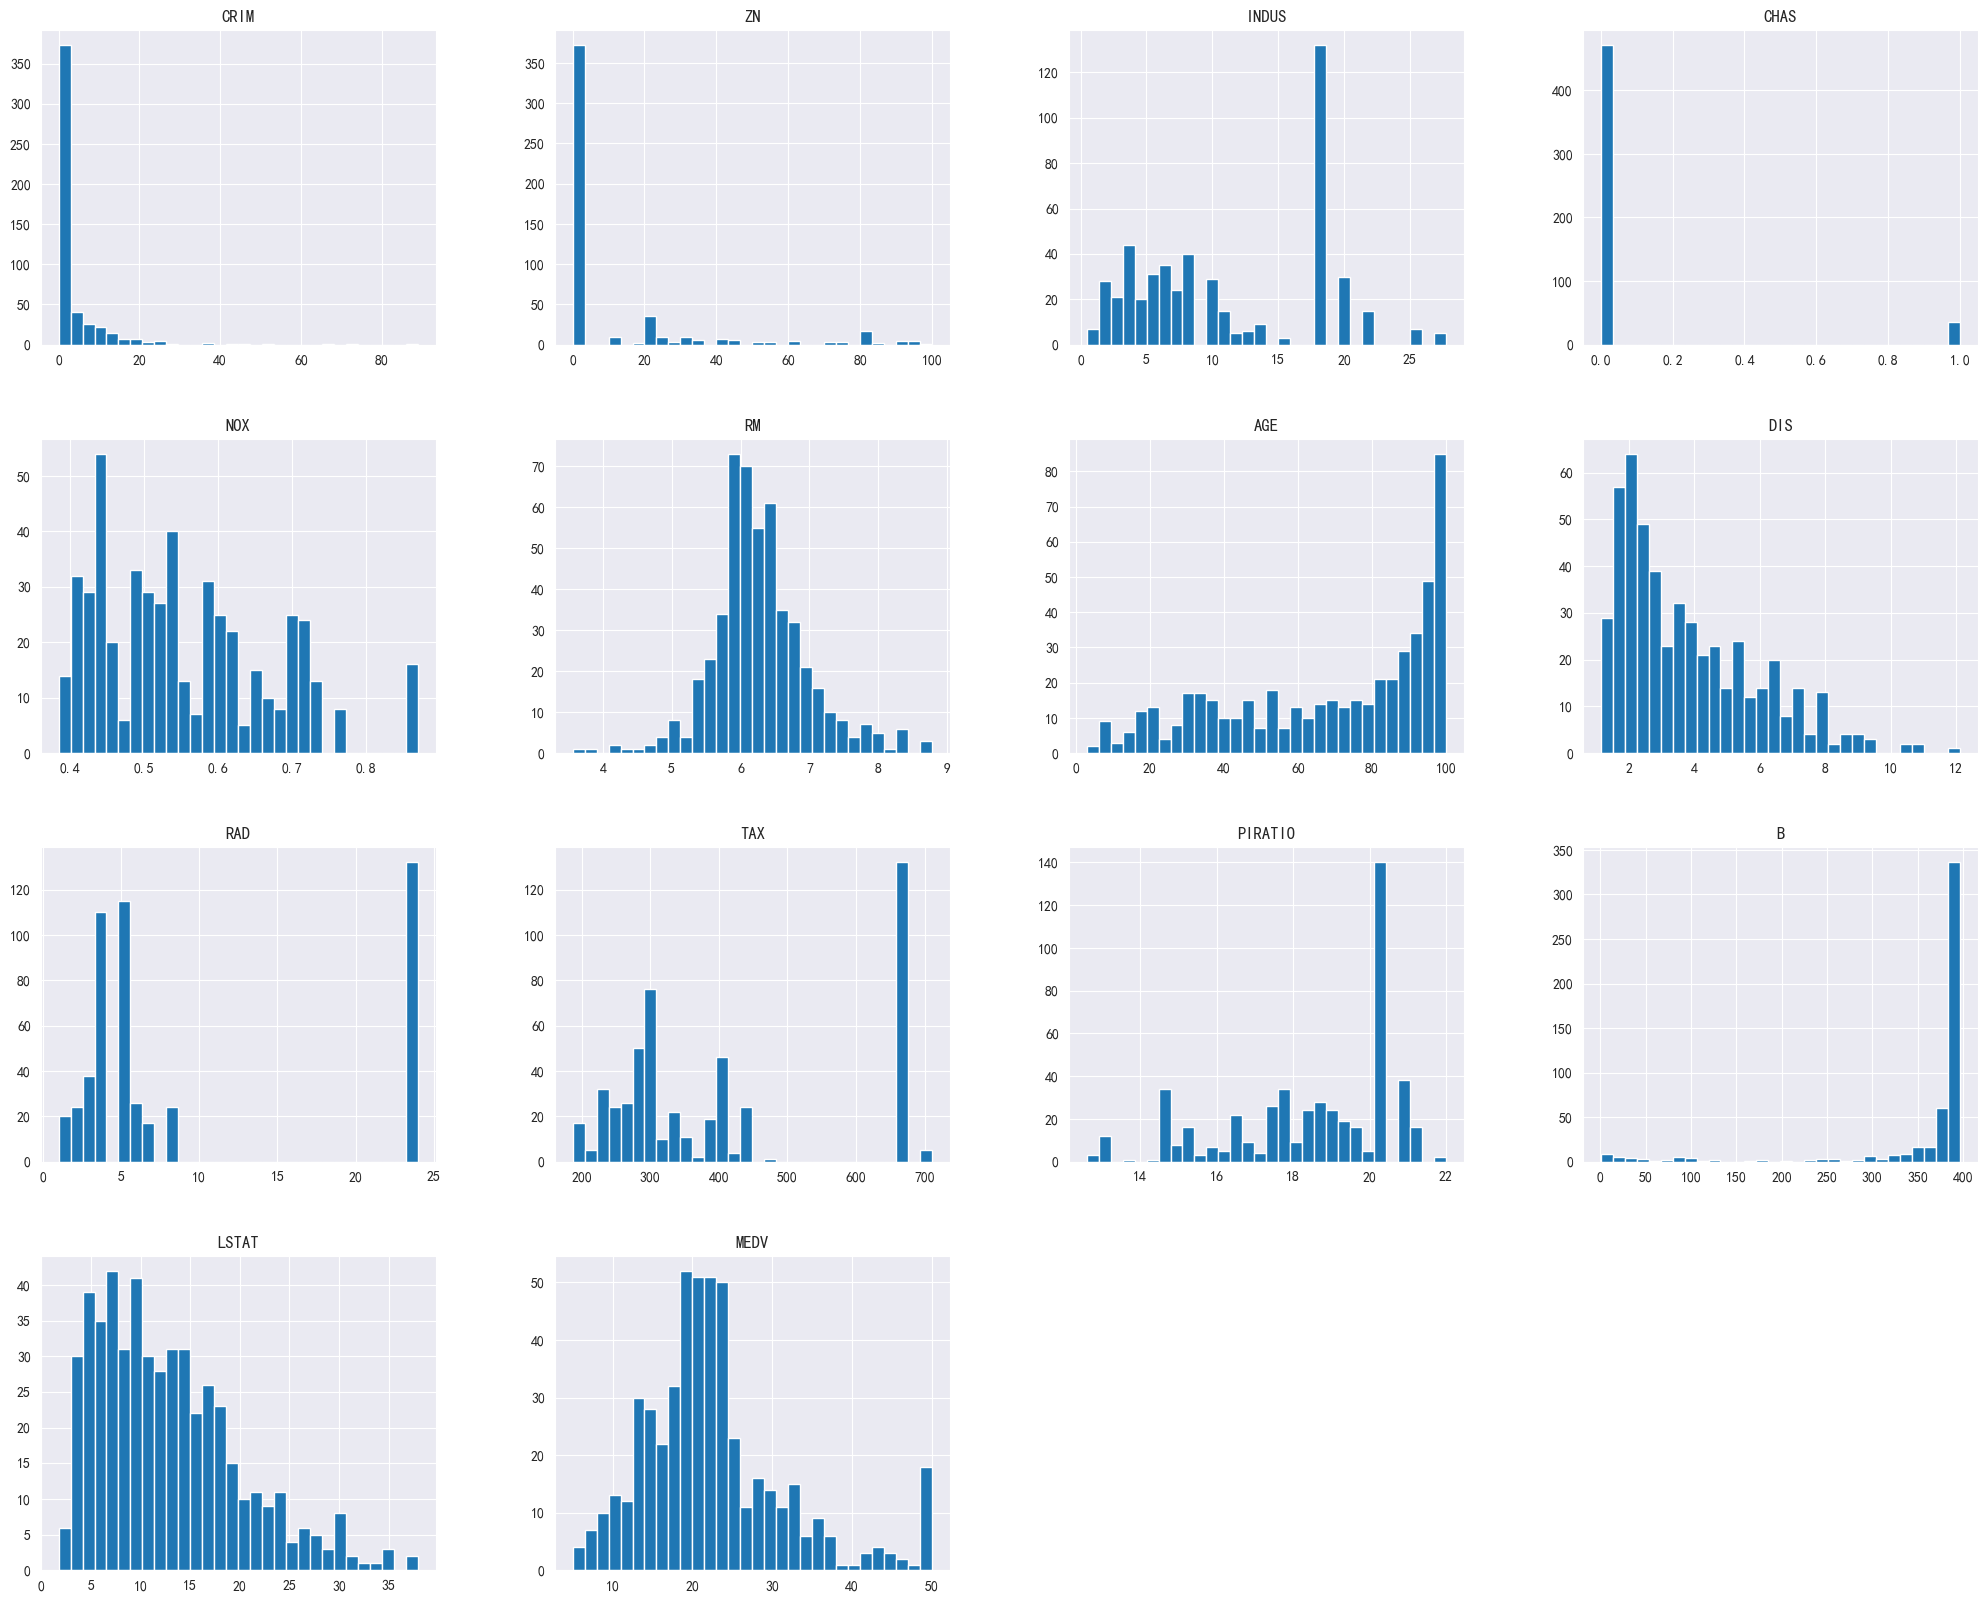

In [212]:
data.hist(bins=(30))#30个小区间

In [213]:
#试了一下一百区间的，发现还是30的更好看data.hist(bins=(100))

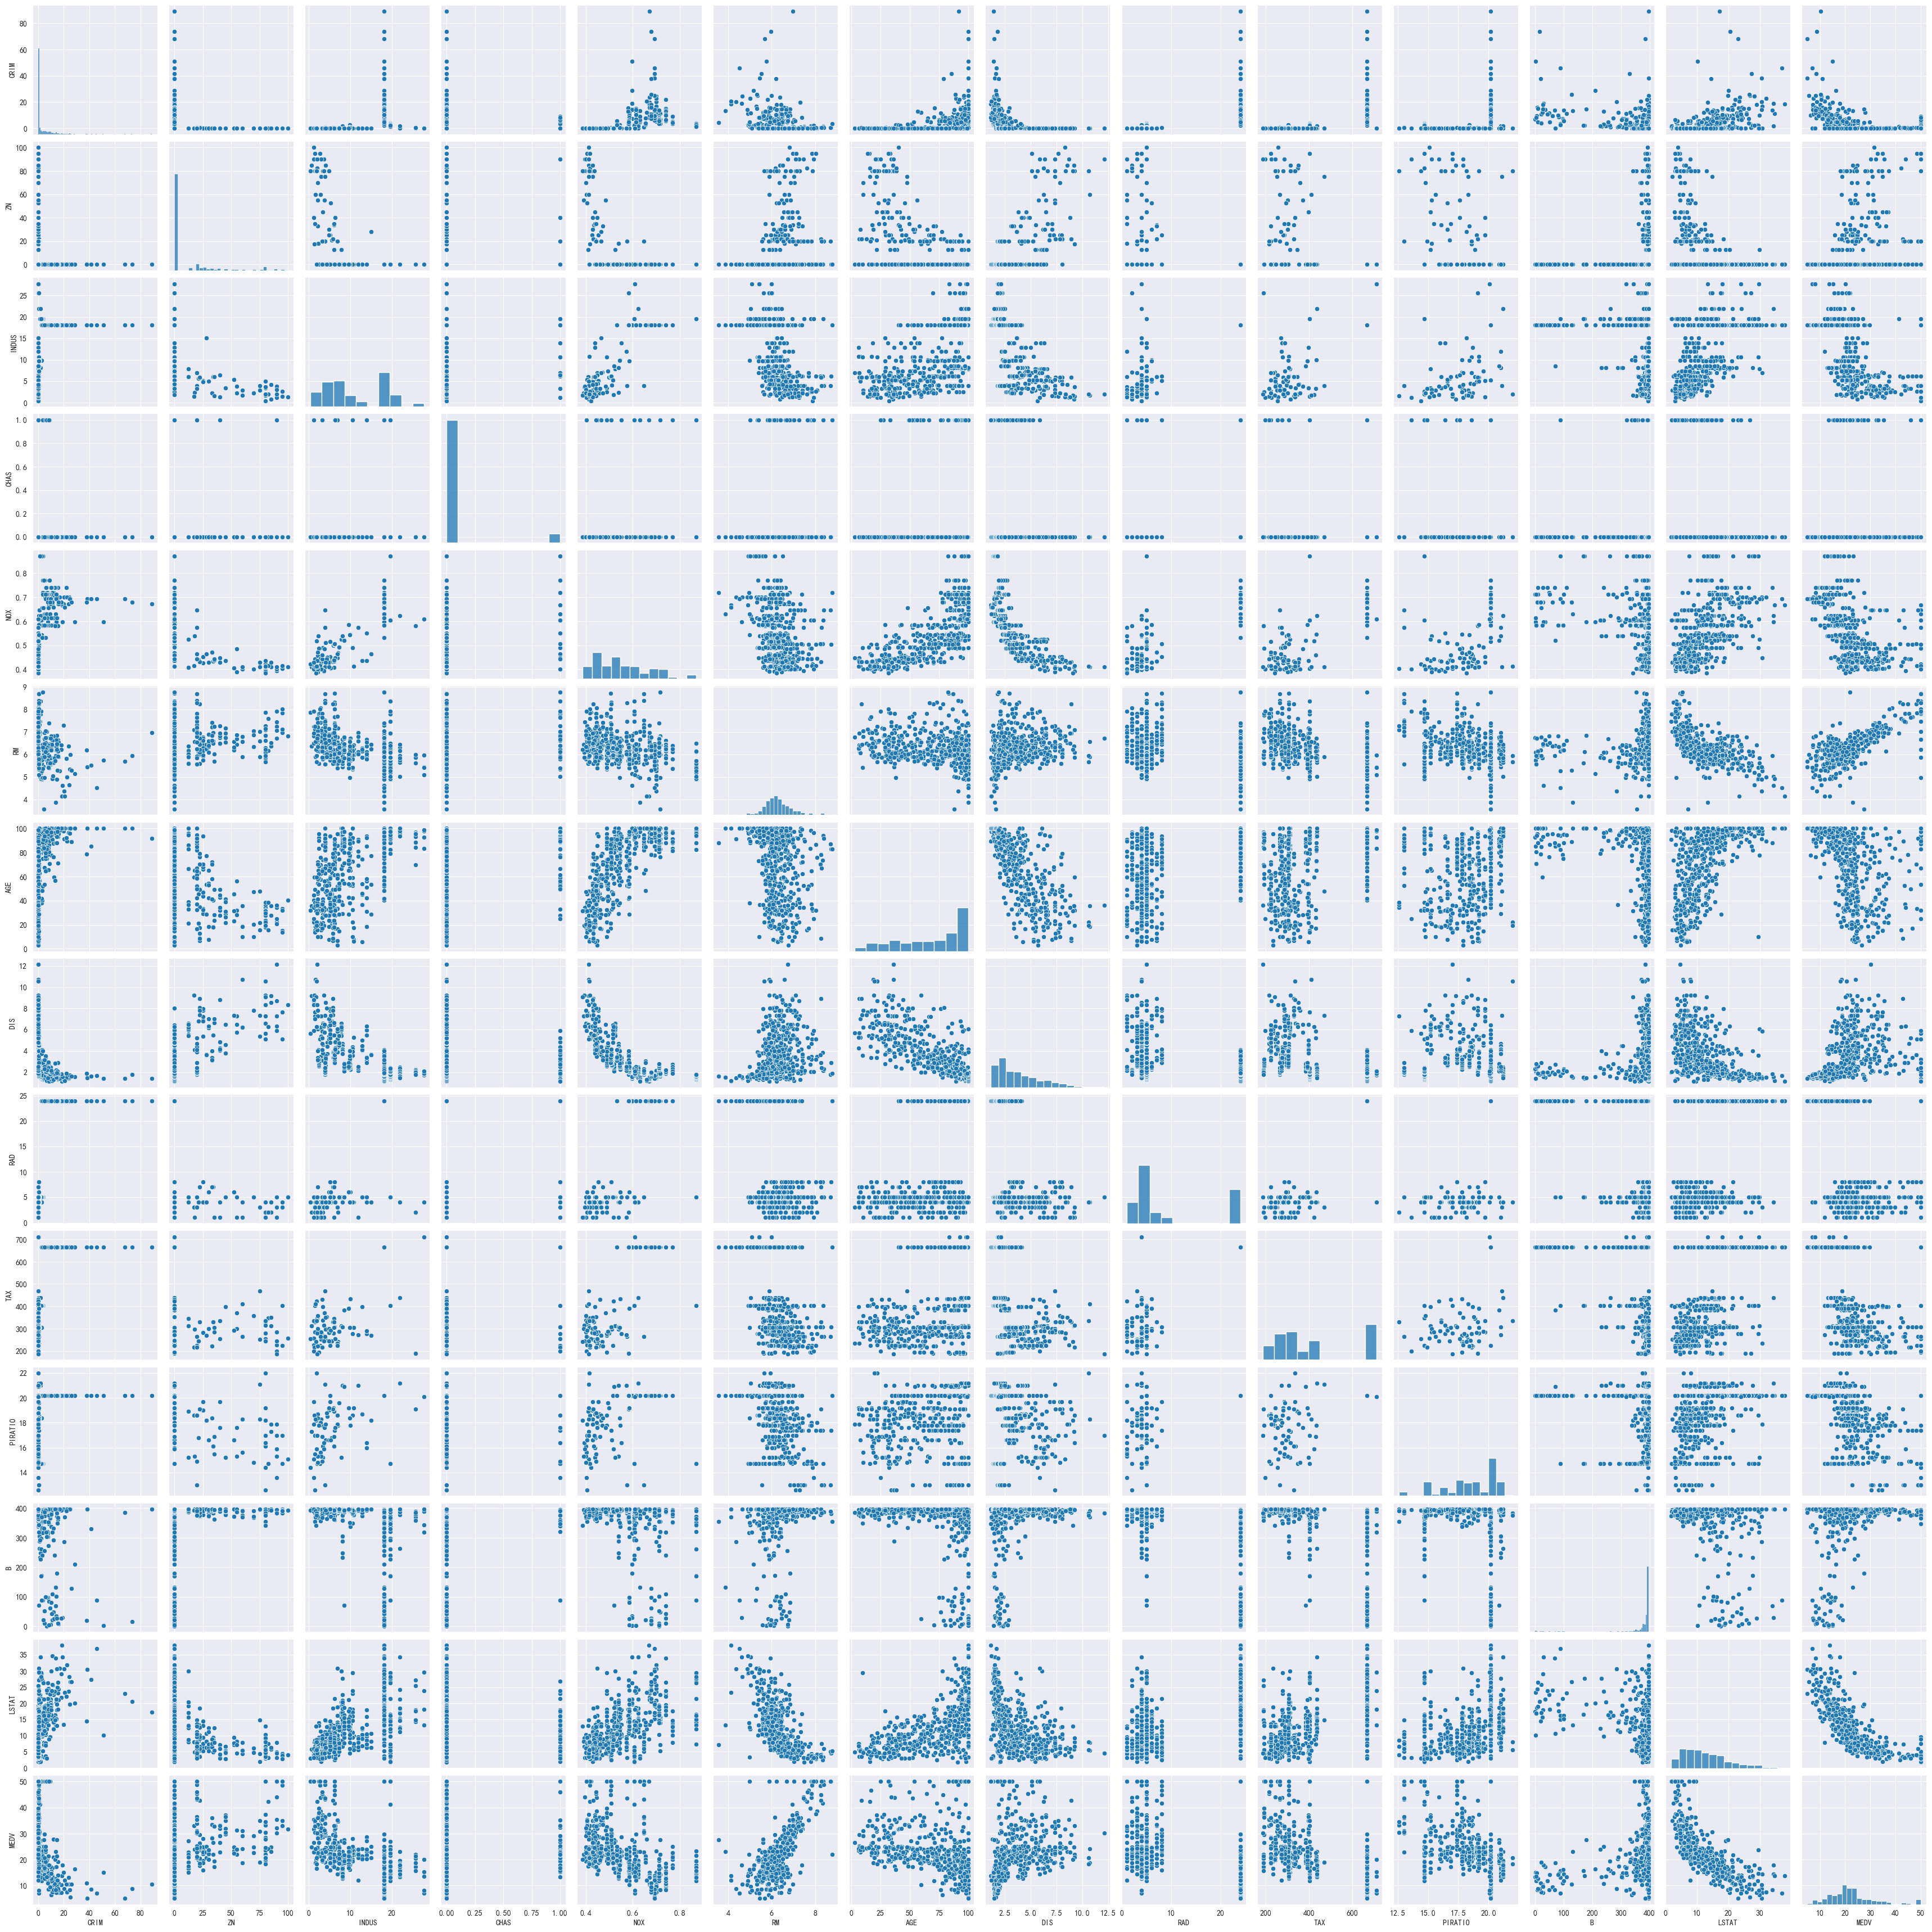

In [214]:
# 绘制两两变量关系的散点图，更方便看出相关关系，就是画图时间久了一点
#这些图片其实是关于中心对称的，所以说没有重复的图只有上三角和下三角
sns.pairplot(data)

<Axes: >

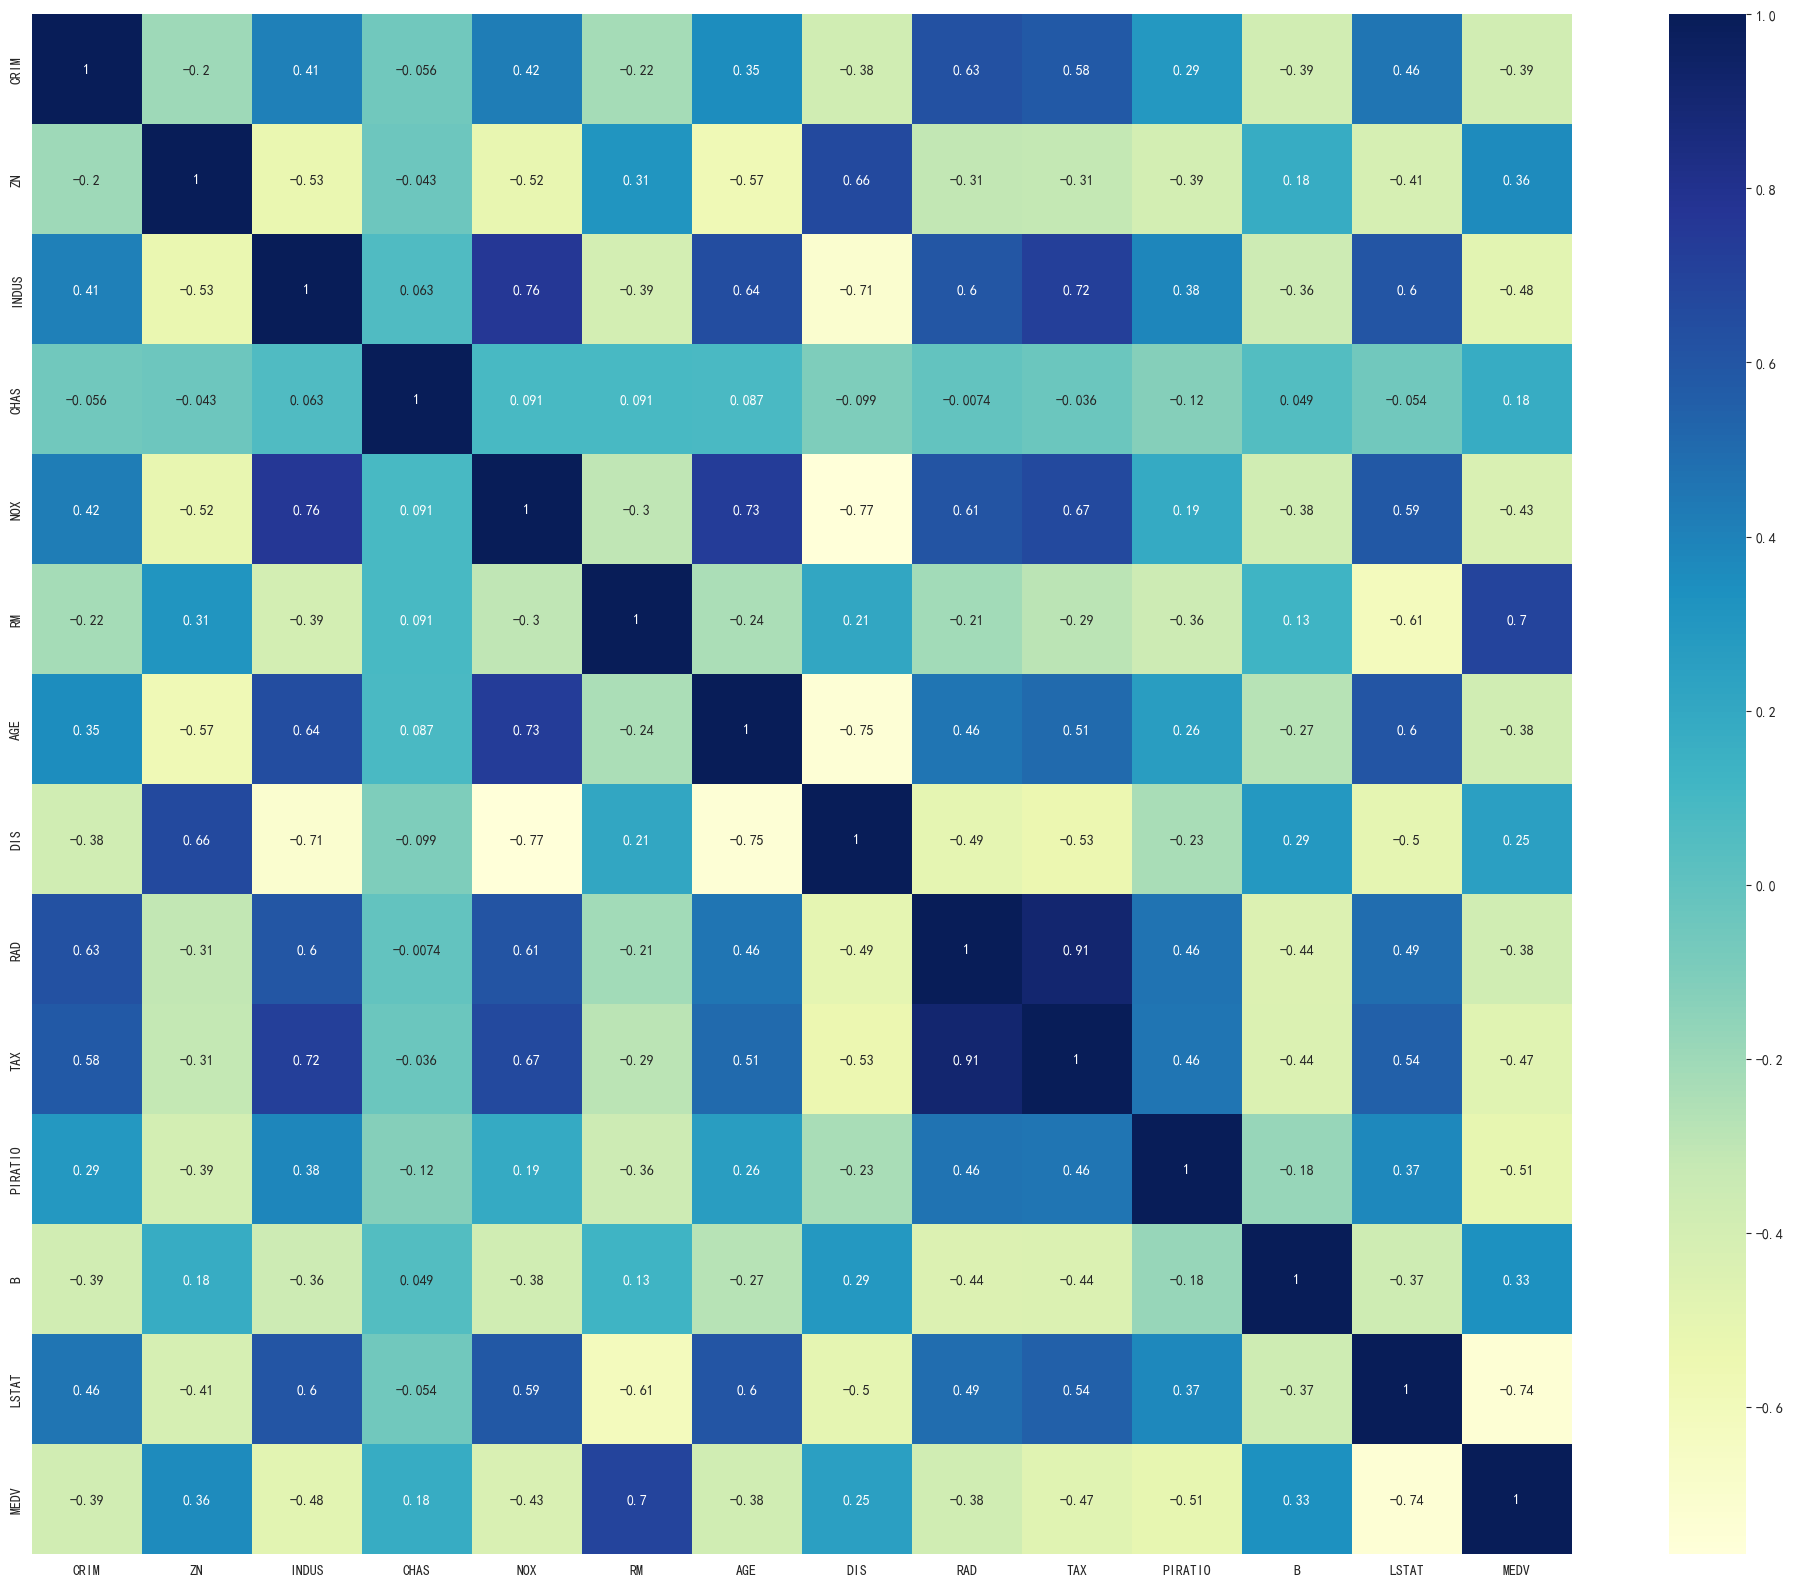

In [215]:
sns.heatmap(data.corr(),square=True,annot=True,cmap='YlGnBu')
# 热力图  14个特征中两两变量之间的皮尔森相关系数

In [216]:
# 设置绘图大小
plt.style.use({'figure.figsize':(10,8)})

In [217]:
# 现在我们把每一个特征与房价之间的散点图绘制出来，方便后面的特征选取
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PIRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

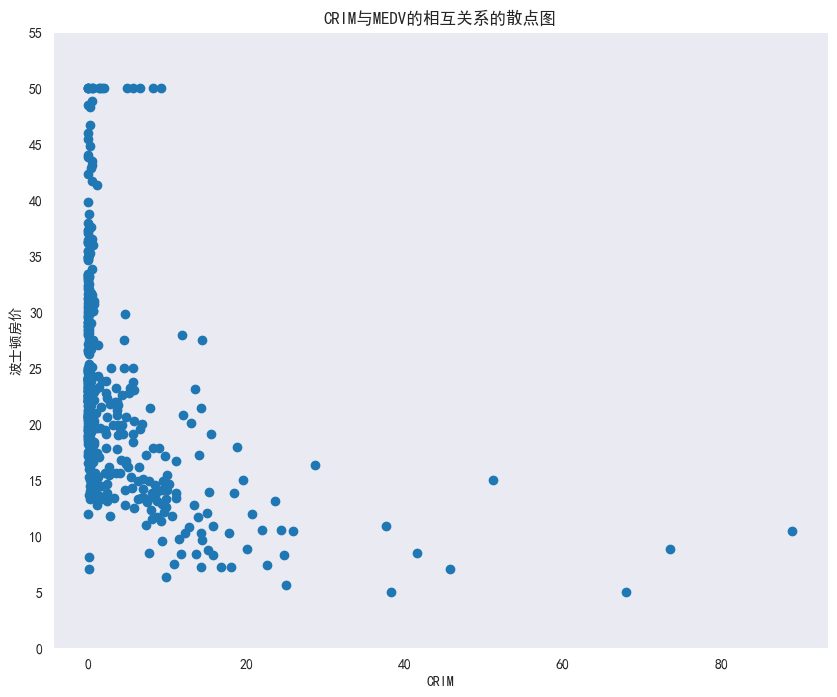

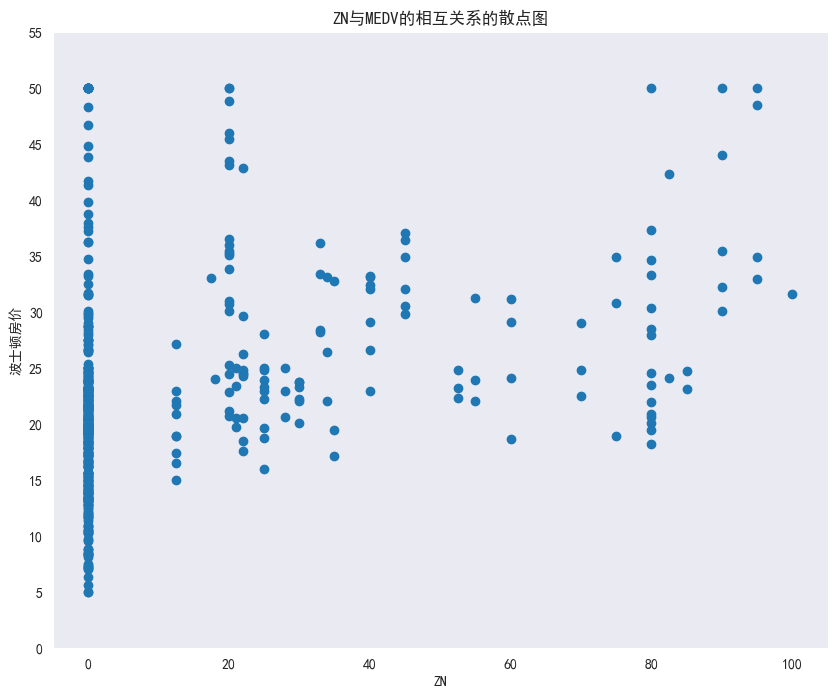

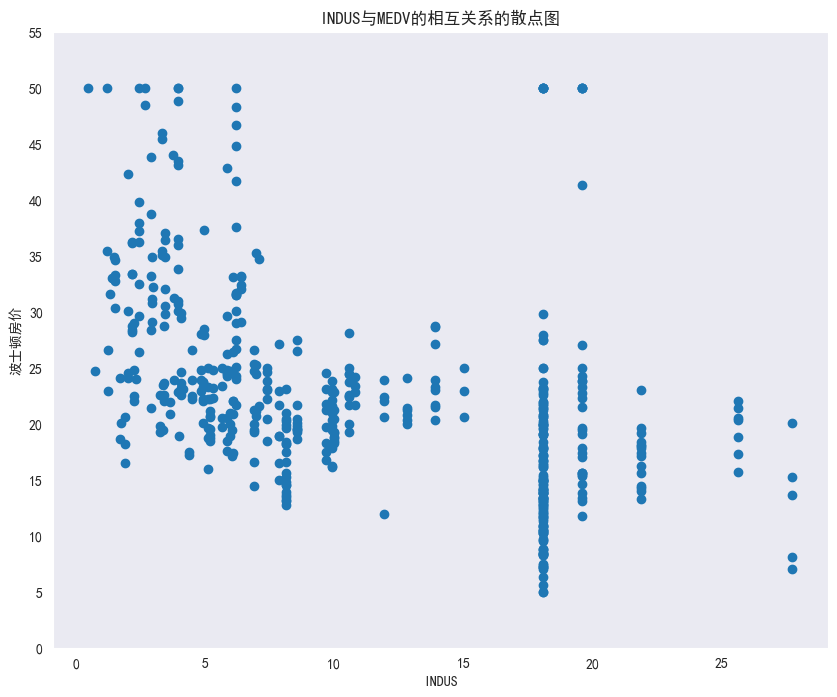

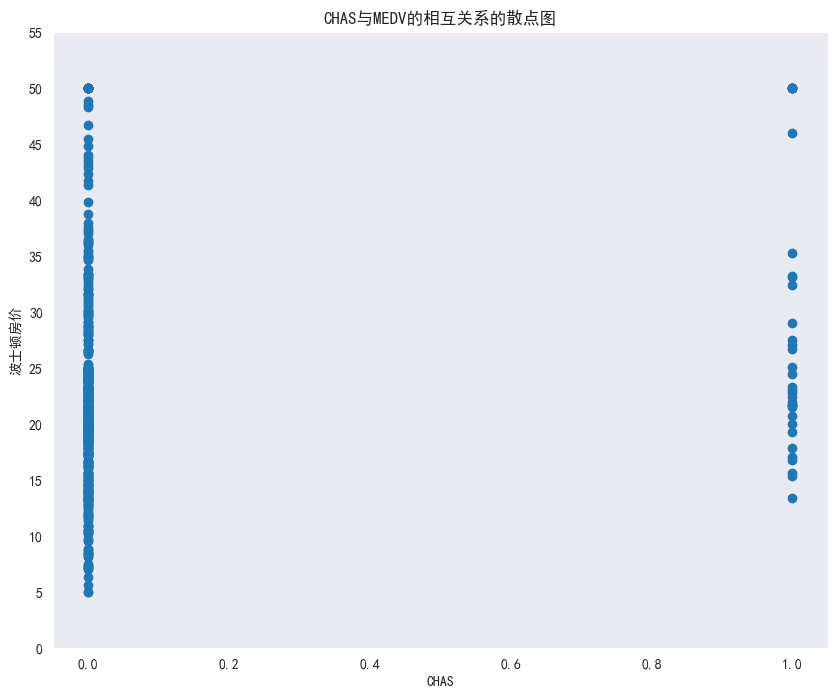

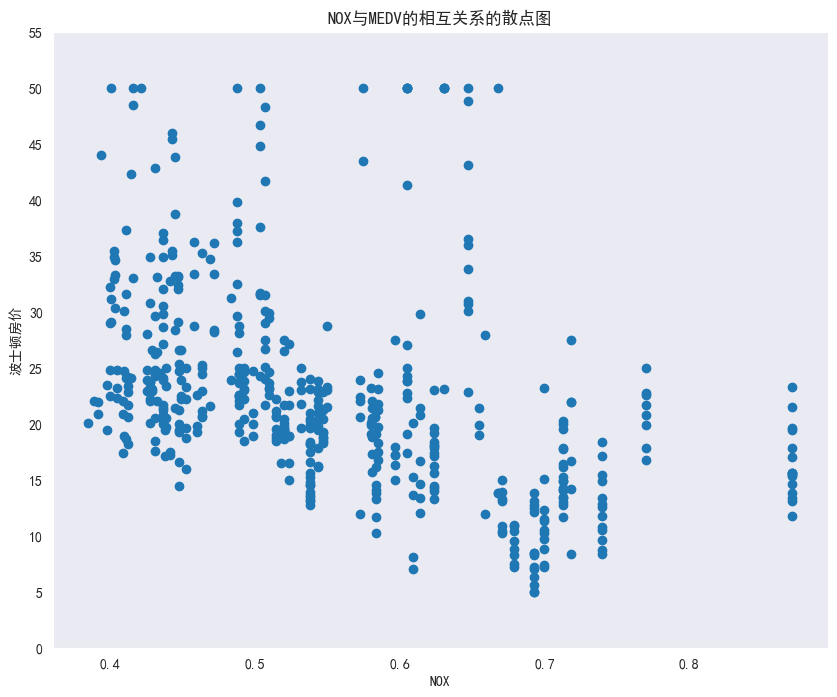

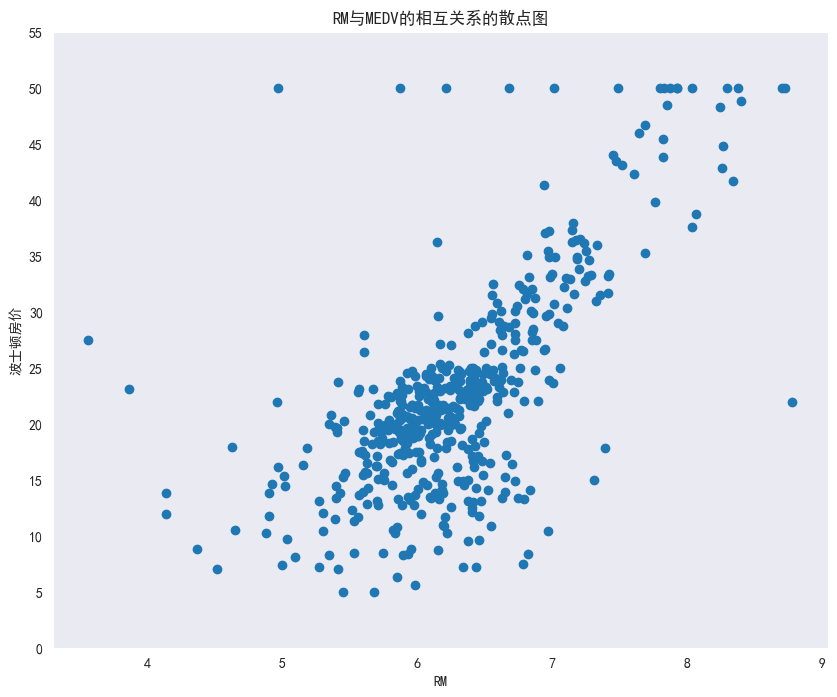

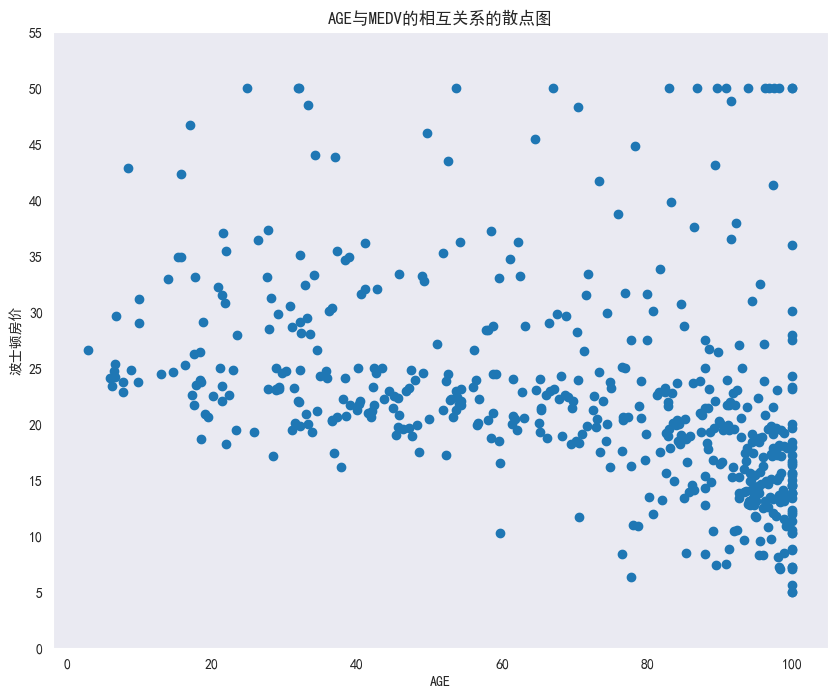

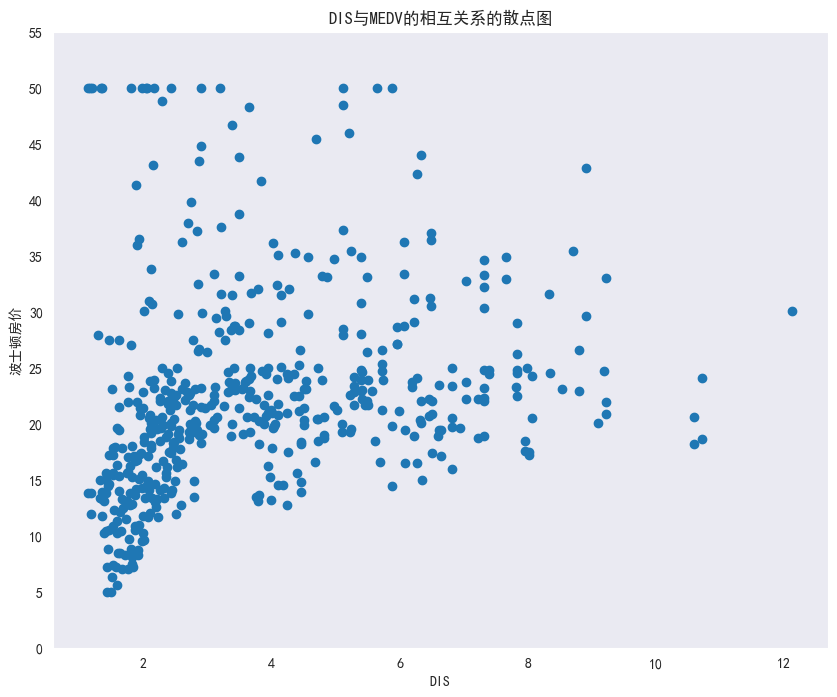

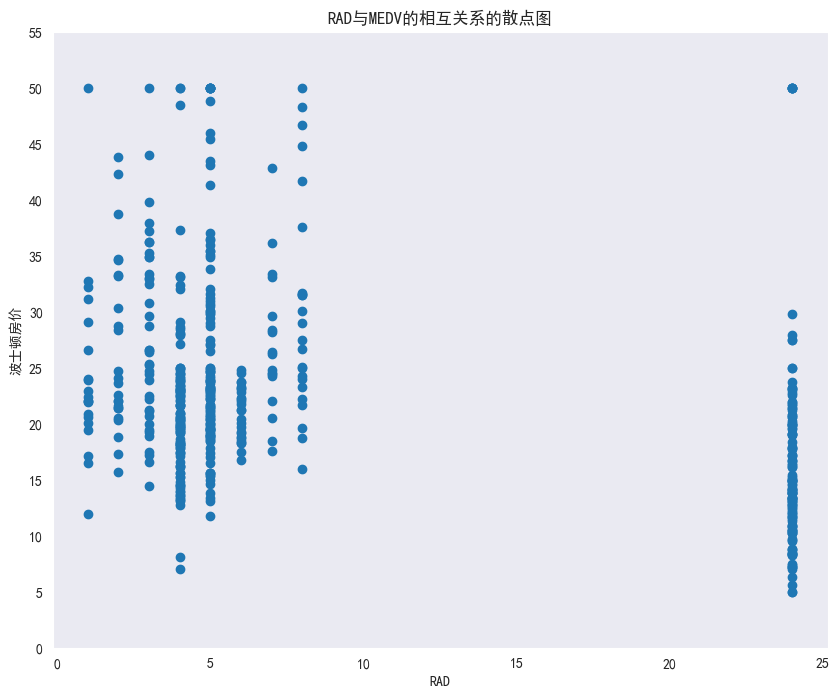

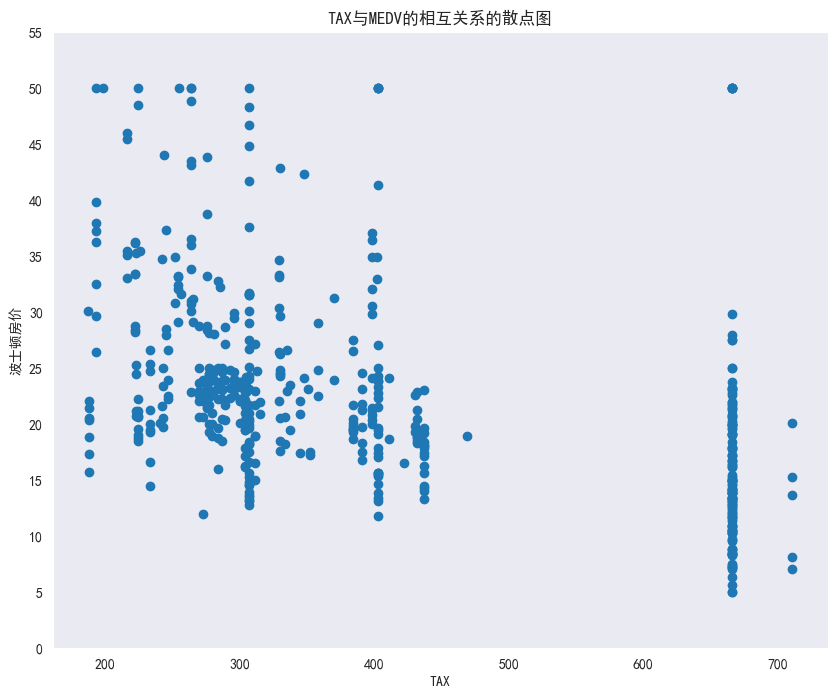

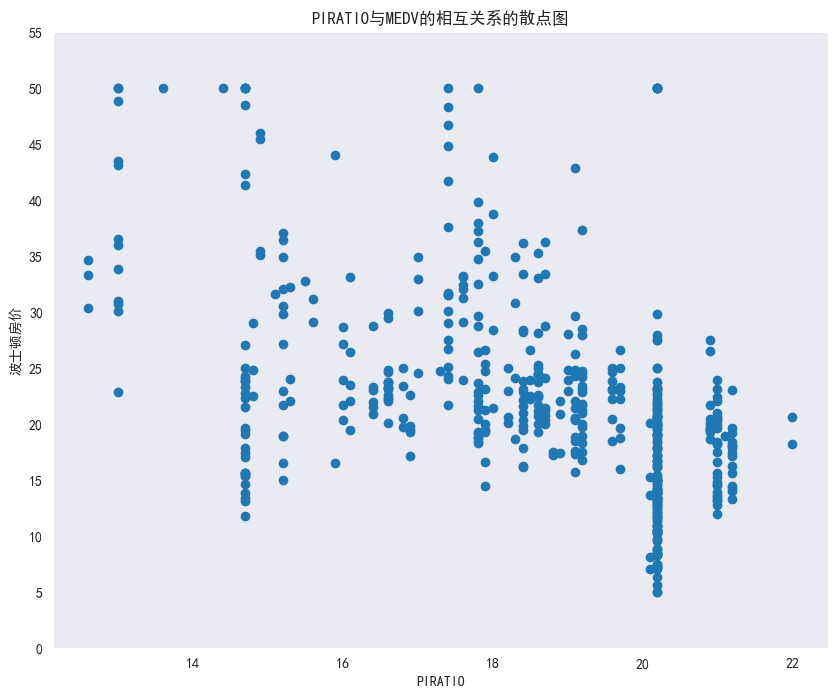

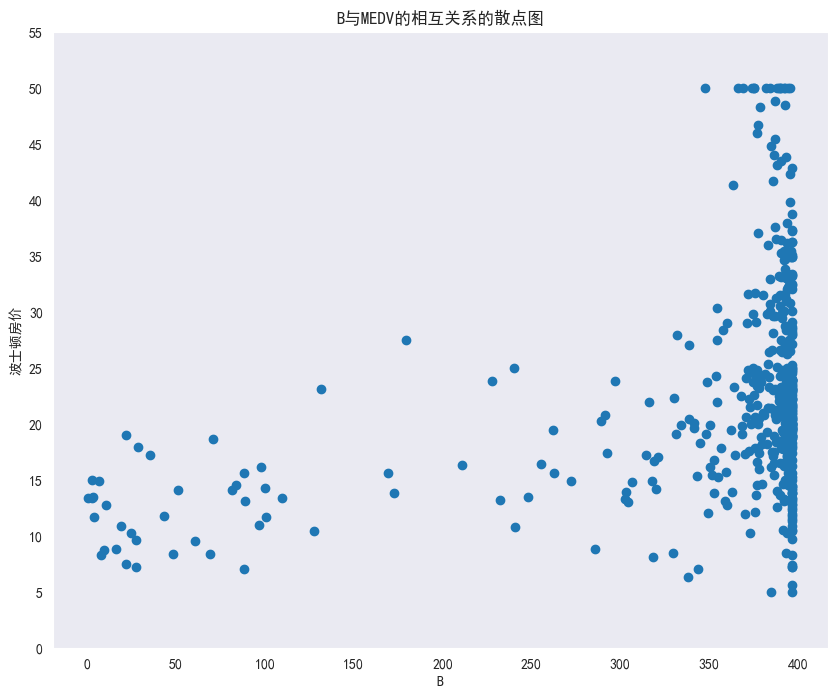

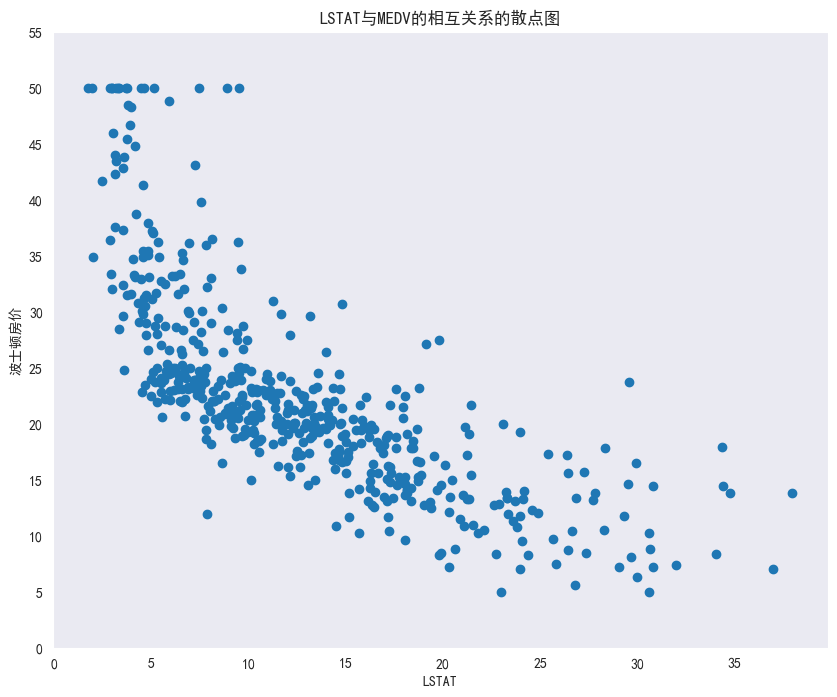

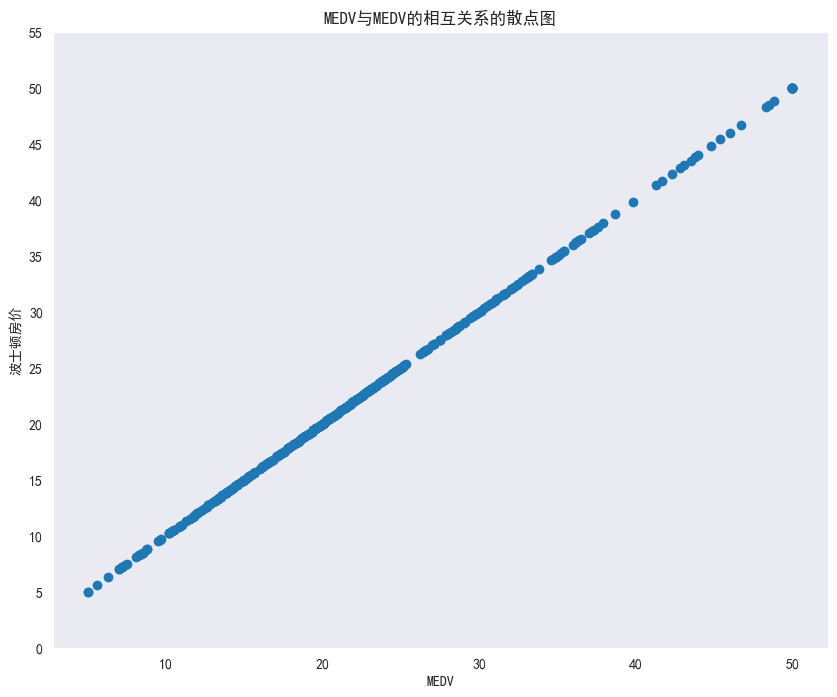

In [218]:
for each in data.columns:#这样可以比较直观地看到这些变量与房价的线性关系
    plt.scatter(data[each],data['MEDV'])
    plt.title('{}与MEDV的相互关系的散点图'.format(each))
    plt.xlabel(each)
    plt.ylabel('波士顿房价')
    plt.yticks(range(0,60,5))
    plt.grid()
    plt.show()

接下来选择相关性良好的特征，
选择相关性强的变量作为选取的最终的特征变量


# LASTAT,,CRIM    似乎为较好的特征变量,pycharm里的md也太卡了，文字还是直接写注释里吧

In [219]:
#虽然我们前面画了一大堆可视化的图，但是一个一个来挑特征变量的话还是太累了，所以我们偷个懒，把线性相
#关系数大于0.3的拿来作为特征变量吧
selected_threshold=0.3  #这个是临界值
corr_series = data.corr()['MEDV'].abs()#存放与房价的相关系数
finally_features=corr_series[(corr_series > selected_threshold)&(corr_series.index!='MEDV')].index.tolist()

print(f"\n\n线性相关系数超过{selected_threshold}的特征为:{finally_features:}")
print(f"它们各自的相关系数：\n{corr_series[finally_features]}")




线性相关系数超过0.3的特征为:['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PIRATIO', 'B', 'LSTAT']
它们各自的相关系数：
CRIM       0.388305
ZN         0.360445
INDUS      0.483725
NOX        0.427321
RM         0.695360
AGE        0.376955
RAD        0.381626
TAX        0.468536
PIRATIO    0.507787
B          0.333461
LSTAT      0.737663
Name: MEDV, dtype: float64


In [220]:
#选好了特征变量后划分数据集
X=data[finally_features].values#构建矩阵与目标向量
y=data['MEDV'].values
np.random.seed(666)#    666这个数字不错，哈哈
indices = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)#八成训练，二成测试
X_train, X_test = X[indices[:train_size]], X[indices[train_size:]]
y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]

In [221]:
#开始我们的最小二乘法LSM部分   y=wx+b
X_train_lsm=np.c_[np.ones((X_train.shape[0],1)), X_train]#设置好截距
X_test_lsm=np.c_[np.ones((X_test.shape[0],1)), X_test]
#计算参数,用linalg.pinv防止奇异矩阵
theta_lsm=np.linalg.pinv(X_train_lsm.T@X_train_lsm)@X_train_lsm.T@y_train

In [222]:
#计算均方误差和决定系数，遗失于记忆深处的高中数学知识迎面扑来
y_pred_lsm=X_test_lsm@theta_lsm
mse_lsm=np.mean((y_pred_lsm-y_test)**2)
r2_lsm=1-(np.sum((y_test-y_pred_lsm)**2)/np.sum((y_test-np.mean(y_test))**2))


In [223]:
#
#
#下面是梯度下降GD

In [224]:
#先进行特征标准化来缩放变量
mu=np.mean(X_train,axis=0)
sigma=np.std(X_train,axis=0)+1e-8
X_train_norm=(X_train-mu)/sigma
X_test_norm=(X_test-mu)/sigma
#设置截距
X_train_gd=np.c_[np.ones((X_train_norm.shape[0],1)), X_train_norm]
X_test_gd=np.c_[np.ones((X_test_norm.shape[0],1)), X_test_norm]

#设置好学习率，迭代次数，参数
alpha=0.01
iterations=2233#2233
theta_gd=np.zeros(X_train_gd.shape[1])


loss_history=[]#用来画损失函数


# 梯度下降开始
for i in range(iterations):
    y_predgd=X_train_gd@theta_gd#预测值
    errors=y_predgd-y_train
    gradient=(X_train_gd.T@errors)/len(y_train)#偏导
    theta_gd=theta_gd-alpha*gradient#更新参数
    loss_history.append(np.sum(errors**2)/(2*len(y_train)))

#计算均方误差和决定系数
y_pred_gd = X_test_gd @ theta_gd
mse_gd = np.mean((y_pred_gd - y_test)**2)
r2_gd = 1 - (np.sum((y_test - y_pred_gd)**2) / np.sum((y_test - np.mean(y_test))**2))

In [225]:
######
######
######

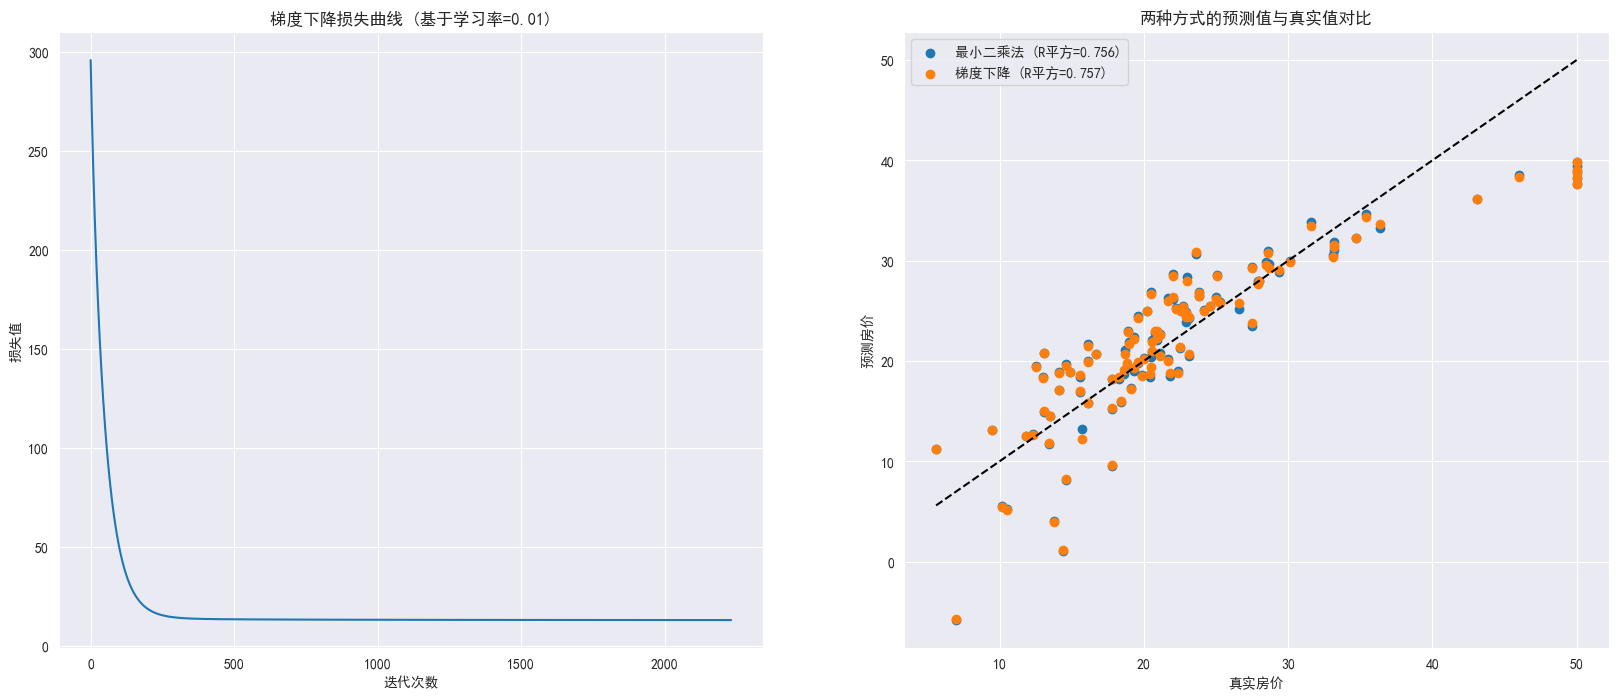

In [226]:
#画图环节
plt.figure(figsize=(20, 8))

# 损失曲线
plt.subplot(1, 2, 1)
plt.plot(range(iterations), loss_history)
plt.title('梯度下降损失曲线 (基于学习率=0.01)')
plt.xlabel('迭代次数')
plt.ylabel('损失值')
plt.grid(True)


#最小二乘法与梯度下降的对比
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lsm, alpha=1, label=f'最小二乘法 (R平方={r2_lsm:.3f})')
plt.scatter(y_test, y_pred_gd, alpha=1, label=f'梯度下降 (R平方={r2_gd:.3f})')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
plt.title('两种方式的预测值与真实值对比')
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.legend()
plt.grid(True)

In [227]:
print("最小二乘法结果：")
print(f"系数θ（截距项+特征）：{theta_lsm}")
print(f"MSE: {mse_lsm:.2f} | R²: {r2_lsm:.4f}")

print('\n')
print("梯度下降法结果：")
print(f"最终系数θ（截距项+特征）：{theta_gd}")
print(f"MSE: {mse_gd:.2f} | R²: {r2_gd:.4f}")

最小二乘法结果：
系数θ（截距项+特征）：[ 2.70008408e+01 -1.14665687e-01 -1.13062235e-03  1.10612520e-01
 -1.07577390e+01  3.83459168e+00  3.68085444e-02  3.96836825e-01
 -1.43622909e-02 -1.04840650e+00  9.12373662e-03 -6.14564586e-01]
MSE: 21.14 | R²: 0.7561


梯度下降法结果：
最终系数θ（截距项+特征）：[22.53391089 -0.99461312 -0.11773515  0.47628758 -1.10954836  2.72072421
  0.99772822  2.85543154 -1.74194492 -2.22806945  0.81769266 -4.27347557]
MSE: 21.06 | R²: 0.7570
